In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:\ML\Employee_sal\employee_income.csv')

In [3]:
df.sample(5)

,age,experience,income
3,42,5,41614
18,42,6,41331
25,37,1,33440
44,35,0,28559
10,45,9,49959


In [4]:
df.shape

(50, 3)

In [5]:
df.describe()

,age,experience,income
count,50.000000,50.000000,50.000000
mean,38.860000,8.580000,44864.060000
std,10.719066,4.116121,6916.729587
min,23.000000,0.000000,28559.000000
25%,29.250000,6.250000,41039.250000
50%,39.500000,9.000000,46205.000000
75%,46.000000,12.000000,50064.000000
max,59.000000,14.000000,57092.000000


In [6]:
df.isnull().sum()

age           0
experience    0
income        0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

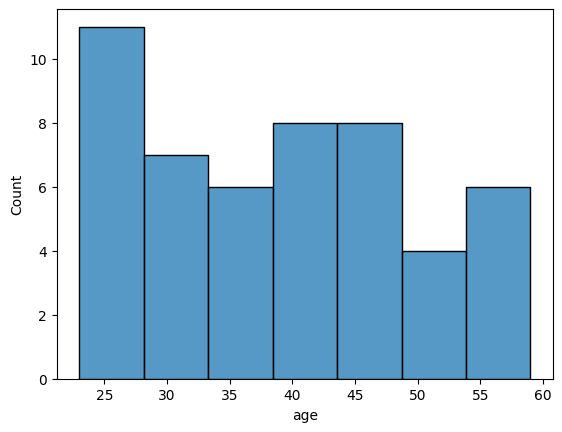

In [10]:
sns.histplot(df['age'])

<Axes: ylabel='experience'>

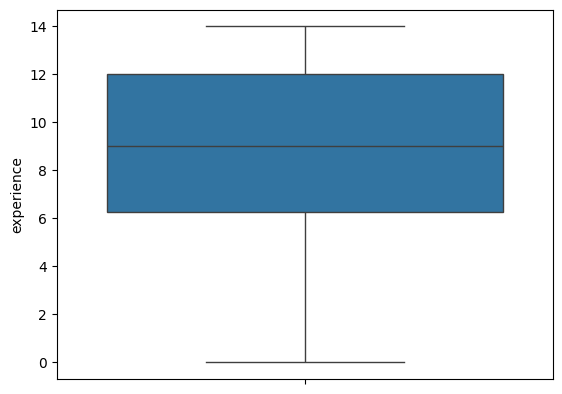

In [15]:
sns.boxplot(df['experience'])

In [16]:
X = df.drop('income',axis = 1)
y = df['income']

In [17]:
X_test,X_train,y_test,y_train = train_test_split(
    X,y,test_size=0.2 , random_state=42
)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
y_pred = model.predict(X_test)

In [22]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE : 1922.3517450315078
MSE : 5527630.363163205
RMSE: 2351.0913132337514
R2 Score: 0.8810963368013537


In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Mean CV R²:", scores.mean())


Mean CV R²: 0.900937840028641


In [24]:
import joblib

# Save trained model
joblib.dump(model, "adp_linear_regression_model.pkl")

# Save scaler
joblib.dump(scaler, "adp_scaler.pkl")

['adp_scaler.pkl']